In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

In [4]:
df=pd.read_csv('homeprices_Assam.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [5]:
x = df.iloc[:, :2] 
x

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [6]:
y = df.iloc[:, -1]
y

0      39.07
1     120.00
2      62.00
3      75.00
4      51.00
5      38.00
6     135.00
7     155.00
8      50.00
9     167.00
10     82.00
11    140.00
12     38.00
13     40.00
14    101.00
15     42.00
16     48.00
17     60.00
18    102.00
19     32.00
Name: price, dtype: float64

In [7]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

x_scale = sx.fit_transform(df.drop('price',axis='columns'))
x_scale

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
y_scale = sy.fit_transform(df[['price']])
y_scale


array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
#Batch Gradient Descent
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    no_of_features=X.shape[1]

    w = np.ones(shape=(no_of_features))
    b = 0

    total_samples=X.shape[0]

    cost_list=[]
    epochs_list=[]

    for i in range(epochs):
        y_predicted = (w@X.T) + b 


        w_gradient = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_gradient = -(2/total_samples)*np.sum(y_true-y_predicted)


        w = w - learning_rate*w_gradient
        b = b - learning_rate*b_gradient


        cost=np.mean(np.square(y_true-y_predicted))

        if i%5 == 0:
            cost_list.append(cost)
            epochs_list.append(i)

    return w,b,cost, cost_list, epochs_list


w, b, cost, cost_list, epochs_list = batch_gradient_descent(x_scale,y_scale.reshape(y_scale.shape[0],),2000)
w, b, cost

(array([0.67110387, 0.53381704]),
 np.float64(-0.14373474765221192),
 np.float64(0.004165903052127229))

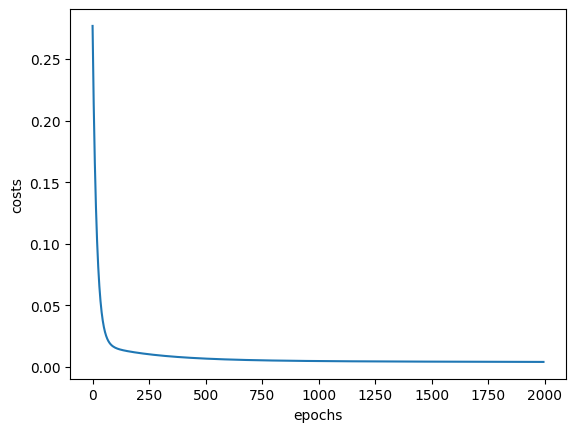

In [11]:
plt.xlabel("epochs")
plt.ylabel("costs")
plt.plot(epochs_list,cost_list)

In [12]:
def prediction(area,bedroom,w,b):
    scaled_x = sx.transform([[area,bedroom]])[0]

    scaled_y =  w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    return sy.inverse_transform([[scaled_y]])[0][0]

prediction(2600,4,w,b)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(122.87866071742575)

In [13]:
prediction(1000,2,w,b)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(36.860342727839246)

In [14]:
prediction(2000,3,w,b)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(86.11771016726763)

In [15]:
import random
random.randint(0,59)

19

In [29]:
#Stoichastic Gradient Descent
def stoichastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    no_of_features=X.shape[1]

    w = np.ones(shape=(no_of_features))
    b = 0

    total_samples=X.shape[0]

    cost_list=[]
    epochs_list=[]

    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = (w@sample_x.T) + b 


        w_gradient = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_gradient = -(2/total_samples)*np.sum(sample_y-y_predicted)


        w = w - learning_rate*w_gradient
        b = b - learning_rate*b_gradient


        cost=np.mean(np.square(sample_y-y_predicted))

        if i%100 == 0:
            cost_list.append(cost)
            epochs_list.append(i)

    return w,b,cost, cost_list, epochs_list


sw, sb, scost, scost_list, sepochs_list = stoichastic_gradient_descent(x_scale,y_scale.reshape(y_scale.shape[0],),20000)
sw, sb, scost

(array([0.66326392, 0.60552083]),
 np.float64(-0.1765828899586311),
 np.float64(0.031243973729627544))

In [26]:
w,b,cost

(array([0.67110387, 0.53381704]),
 np.float64(-0.14373474765221192),
 np.float64(0.004165903052127229))

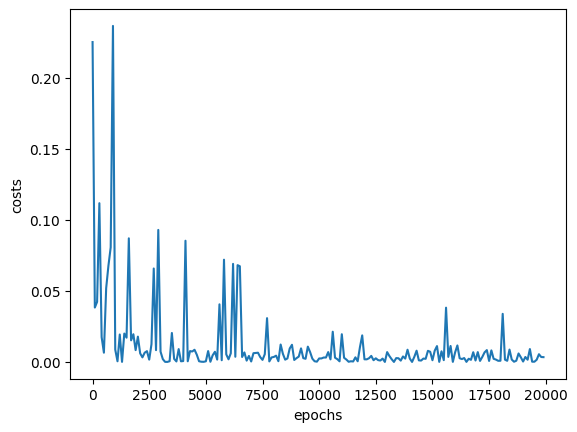

In [30]:
plt.xlabel("epochs")
plt.ylabel("costs")
plt.plot(sepochs_list,scost_list)

In [31]:
prediction(1000,2,sw,sb)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(34.7728538079558)

In [33]:
prediction(2600,4,sw,sb)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(125.04723645359314)